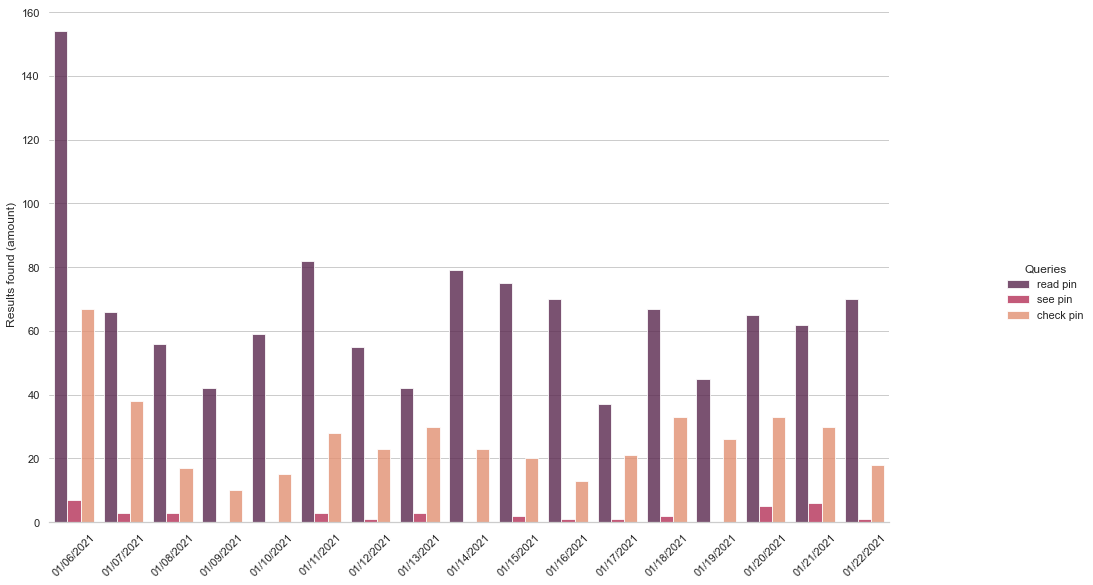

In [18]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import ujson as uj

# Load the data
with open("data.json", "r", encoding="utf-8") as fp:
    data = uj.load(fp)

new_data = []
for day, queries in data.items():
    for query, results in queries.items():
        commit = {"day": day, "query": query, "results": results}
        new_data.append(commit)

df = pd.json_normalize(new_data, max_level=0)

# Time to display ¯\_(ツ)_/¯
sns.set_theme(style="whitegrid")
g = sns.catplot(
    data=df,
    kind="bar",
    hue="query",
    x="day",
    y="results",
    ci="cd",
    alpha=0.8,
    height=6,
    palette="rocket",
)
g.despine(left=True)
g.set_axis_labels("", "Results found (amount)")
g.legend.set_title("Queries")
g.set_xticklabels(rotation=45)

g.fig.set_figwidth(16)
g.fig.set_figheight(8)
